# Notebook to run the full selection using the new data loader class

##### Import the data loader

In [1]:
import sys
sys.path.append("../../../old_notebooks")
sys.path.append("../../../")


# Import the data loader
%load_ext autoreload
%autoreload 2
import data_loading as dl
from importlib import reload
reload(dl)
import pandas as pd

##### Import the selection algorithms and plotter objects

In [2]:
from unblinding_far_sideband import *
import localSettings as ls
import plotter

##### Load the data and create the plotter object

In [3]:
# Remove the load_lee flag to disable adding the LEE prediction
RUN = 1
samples,weights,data_pot = dl._load_run(run_number=RUN,data="bnb",loadpi0variables=True, loadshowervariables=True, loadrecoveryvars=True,loadsystematics=True,load_lee=True,blinded=False)
pl = plotter.Plotter(samples,weights,data_pot)

Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run1/nuepresel/run1_nuepresel.root
Using old buggy code for energy estimation


../../../data_loading.py:1062: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../../data_loading.py:1062: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../../data_loading.py:578: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../../data_loading.py:578: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run1/nuepresel/data_extbnb_mcc9.1_v08_00_00_25_reco2_C_all_reco2.root
Using old buggy code for energy estimation
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run1/nuepresel/prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run1_reco2_reco2.root


../../../data_loading.py:741: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot / mc_p_prot, np.nan)


Using old buggy code for energy estimation
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run1/nuepresel/prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run1_reco2_reco2.root
Using old buggy code for energy estimation
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run1/nuepresel/prodgenie_bnb_dirt_overlay_mcc9.1_v08_00_00_26_run1_reco2_reco2.root
Using old buggy code for energy estimation
Loading lee sample
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run1/nuepresel/prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run1_reco2_reco2.root
Using old buggy code for energy estimation


../../../old_notebooks/plotter.py:290: UserWarning: Missing dirt sample
  warnings.warn("Missing dirt sample")


##### Draw the plot!

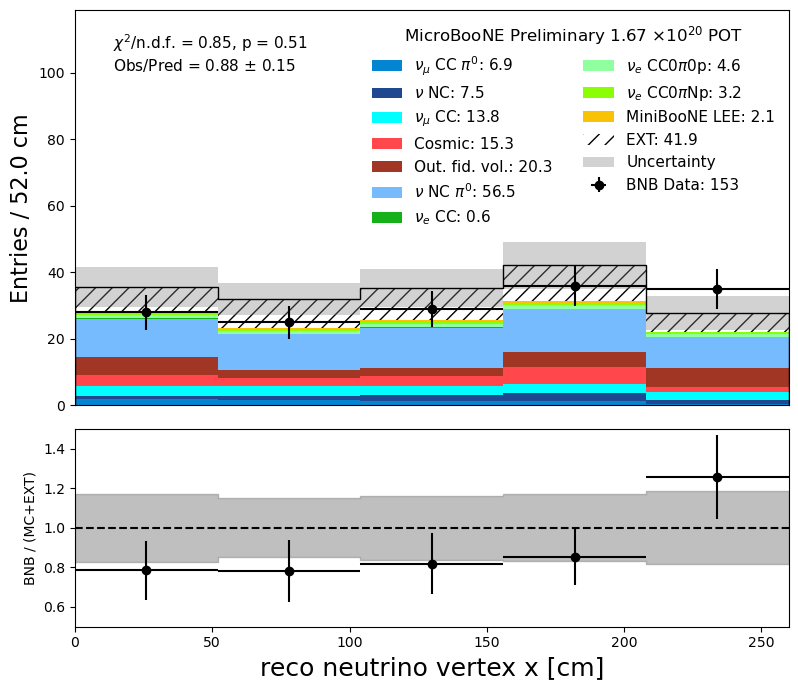

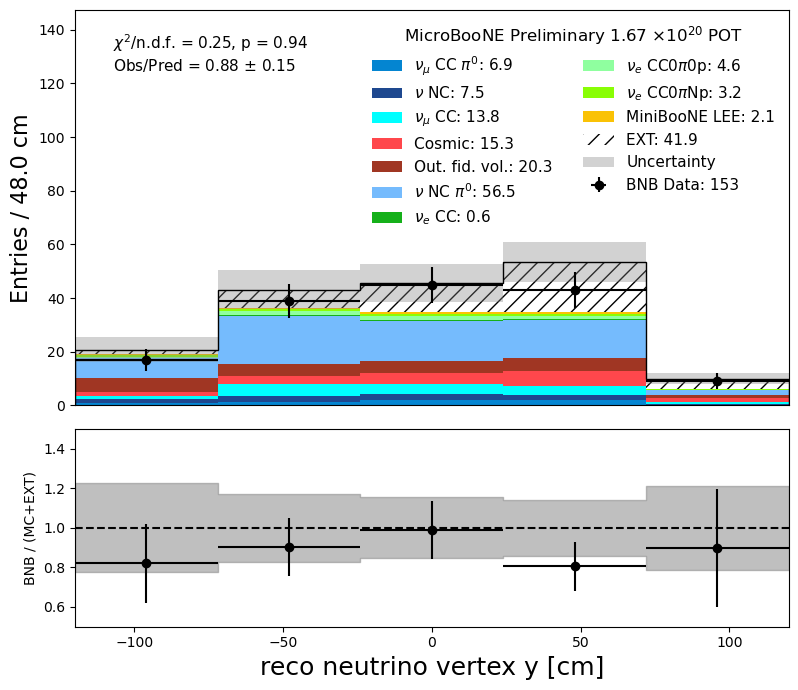

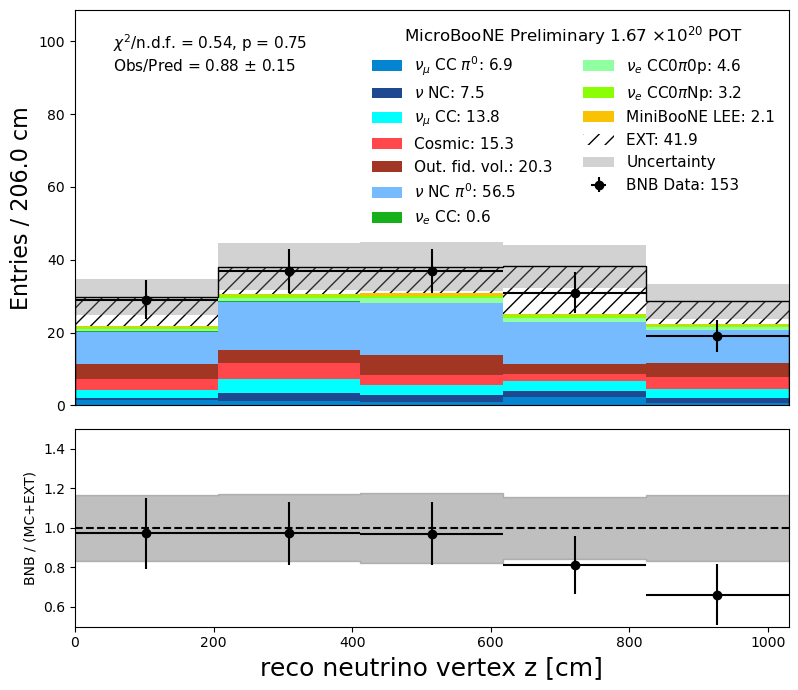

In [9]:
from microfit import variable_definitions as vdef    

# choose sideband, preselection, and selection
# find defintions in unblinding_far_sideband.py
sdb_key = 'None' #'None'
pre_key = 'ZP'
sel_key = 'ZPLOOSESEL'
run = RUN
variables = vdef.vtx_variables

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])
DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}


QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'
        
#formatting can be improved..
TITLE = ""

for binning_def in variables:    
    
    VARIABLE, BINS, RANGE, XTIT = binning_def[0],binning_def[1],binning_def[2],binning_def[3]

    fig, ax1, ax2 = pl.plot_variable(
        VARIABLE,   
        query=QUERY,
        kind="event_category",
        #kind="paper_category",
        draw_sys=True,
        detsysdict=DETSYS,
        DETSYSPATH=DETSYSPATH,
        COVMATRIX="",#'cov_matrix_Enu_reco_1eNp.txt',
        ratio=True,
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE,
        chisq=True,
        draw_data=True
        #asymErrs=True
    )[0:3]

    ax1.set_title(TITLE, loc='left')
    ax1.set_ylim(0., ax1.get_ylim()[1]*2.3)s